In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error






load dataset

In [33]:
df = pd.read_csv("../data/raw/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


split data into independent and dependent variables

In [34]:
x = df[["Hours Studied","Previous Scores"]]
y = df["Performance Index"]


split data into train and test

In [35]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


build Multilinear model and train the model

In [36]:
regressor =LinearRegression()


In [37]:
regressor.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


analyzing the prediction of the model

In [38]:
y_pred_train = regressor.predict(X_train)


In [39]:
print(X_train.shape)
print(y_train.shape)

(8000, 2)
(8000,)


calculate the residual

In [40]:
residual = y_train - y_pred_train

The baseline multiple linear regression model using Hours Studied and Previous Scores shows no strong violations of linear regression assumptions. Residuals are centered around zero with roughly constant variance, indicating that the model provides a reasonable linear fit to the training data.

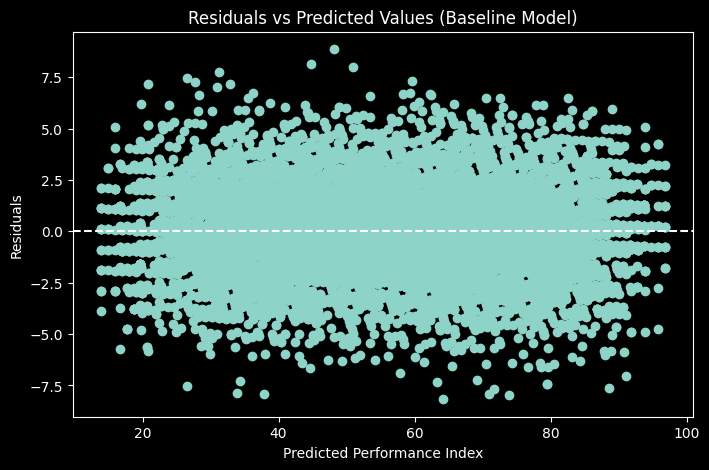

In [42]:


# Residuals vs Predicted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_train, residual)
plt.axhline(y=0, linestyle="--")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Baseline Model)")
plt.show()

In [44]:
print(f"r2Score : {r2_score(y_train, y_pred_train)}")
print(f"mseScore : {mean_squared_error(y_train, y_pred_train)}")
print(f"maeScore : {mean_absolute_error(y_train, y_pred_train)}")


r2Score : 0.9858696583934669
mseScore : 5.20947497540188
maeScore : 1.8163950641099904


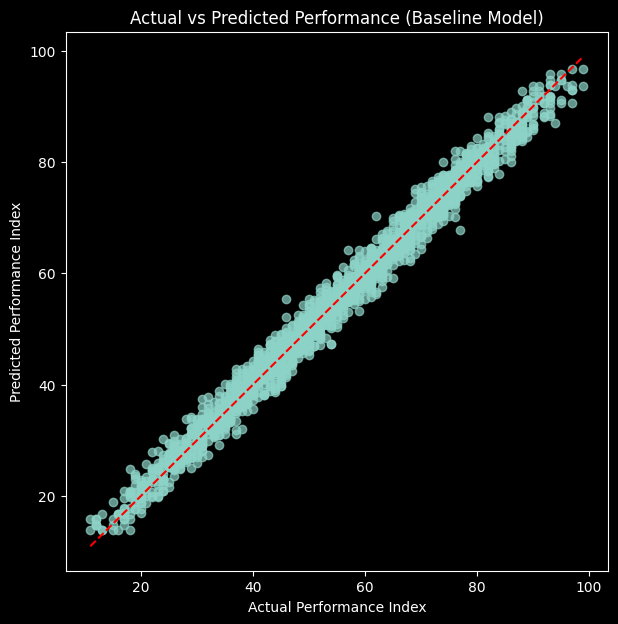

In [47]:
# Predict on test set
y_pred_test = regressor.predict(X_test)

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    color="red"
)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance (Baseline Model)")
plt.show()
